In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
from lungmask import mask


In [2]:
os.sys.path.append('../')
import config

In [4]:
img_sitk = sitk.ReadImage(os.path.join(config.paths["data_CT0"], "study_0001.nii.gz"))
img_nib = nib.load(os.path.join(config.paths["data_CT0"], "study_0001.nii.gz"))

In [5]:
segmentation = mask.apply(img_sitk, batch_size=1, noHU=False)

100%|██████████| 3/3 [00:00<00:00, 271.78it/s]


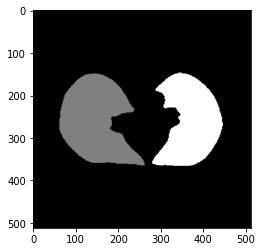

In [6]:
plt.imshow(segmentation.transpose(1,2,0)[:,:,25], cmap=plt.cm.gray)

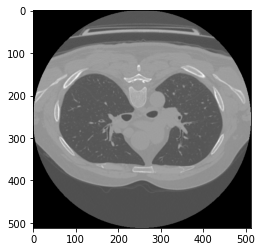

In [7]:
plt.imshow(img_nib.get_fdata().transpose(1,0,2)[:,:,25], cmap=plt.cm.gray)

In [8]:
img_nib.header['pixdim']

array([-1.  ,  0.68,  0.68,  8.  ,  0.  ,  0.  ,  0.  ,  0.  ],
      dtype=float32)

In [14]:
config.paths

{'data_CT0': '/media/david/DATA/Covid-Data/COVID19_1110/studies/CT-0',
 'data_CT1': '/media/david/DATA/Covid-Data/COVID19_1110/studies/CT-1',
 'data_CT2': '/media/david/DATA/Covid-Data/COVID19_1110/studies/CT-2',
 'data_CT3': '/media/david/DATA/Covid-Data/COVID19_1110/studies/CT-3',
 'data_CT4': '/media/david/DATA/Covid-Data/COVID19_1110/studies/CT-4'}

In [18]:
for key, path in config.paths.items():
    for image in os.listdir(path):
        img_nib = nib.load(os.path.join(path, image))
        print(img_nib.header['pixdim'])

[-1.    0.68  0.68  8.    0.    0.    0.    0.  ]
[-1.     0.709  0.709  8.     0.     0.     0.     0.   ]
[-1.    0.74  0.74  8.    0.    0.    0.    0.  ]
[-1.     0.824  0.824  8.     0.     0.     0.     0.   ]
[-1.     0.736  0.736  8.     0.     0.     0.     0.   ]
[-1.     0.702  0.702  8.     0.     0.     0.     0.   ]
[-1.     0.782  0.782  8.     0.     0.     0.     0.   ]
[-1.     0.782  0.782  8.     0.     0.     0.     0.   ]
[-1.     0.827  0.827  8.     0.     0.     0.     0.   ]
[-1.     0.831  0.831  8.     0.     0.     0.     0.   ]
[-1.     0.816  0.816  8.     0.     0.     0.     0.   ]
[-1.     0.972  0.972  8.     0.     0.     0.     0.   ]
[-1.    0.74  0.74  8.    0.    0.    0.    0.  ]
[-1.     0.741  0.741  8.     0.     0.     0.     0.   ]
[-1.     0.647  0.647  8.     0.     0.     0.     0.   ]
[-1.     0.668  0.668  8.     0.     0.     0.     0.   ]
[-1.     0.789  0.789  8.     0.     0.     0.     0.   ]
[-1.     0.785  0.785  8.     0.     0